# 107年物理系實驗室用電量統計

## TO DO LIST
- [x] 可以看看各樓層用電量
- [x] 各領域用電量的差別
- [x] 月份的差別
- [x] PI排名

## 動機
從[臺灣大學物理系實驗室用電資訊系統](http://140.112.102.175/ROOM/)，可以讀取各實驗室房間整年用電量以及年排名報表。  
但還缺少：  
1. 不同樓層個別的用電量統計
2. 不同領域的用電量統計
3. 各計畫主持人的耗電量  

我自己認爲第三點很重要，凝態大樓一直有被說用電量太高。  
物理系主任也總是說會盡量省電，但不能省**研究產出**需要的用電。  
每個計畫主持人也會繳交管理費給物理系，但有沒有符合比例原則？  
不過這邊的資料我們看不出實驗室之外的一般用電、系辦、系圖等等。  

## 抓107年整年用電量報表

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import locale
mpl.rc("font", family = "Noto Sans CJK TC")
df = pd.read_html("http://140.112.102.175/ROOM/fn6/report9.aspx?yr=107")
locale.setlocale(locale.LC_NUMERIC,'')
room_name = df[0].loc[2][1:58].values     ### 實驗室中文名稱
room_num = df[1].loc[2][1:].values        ### 實驗室房號

## 我自己實驗室的用電量

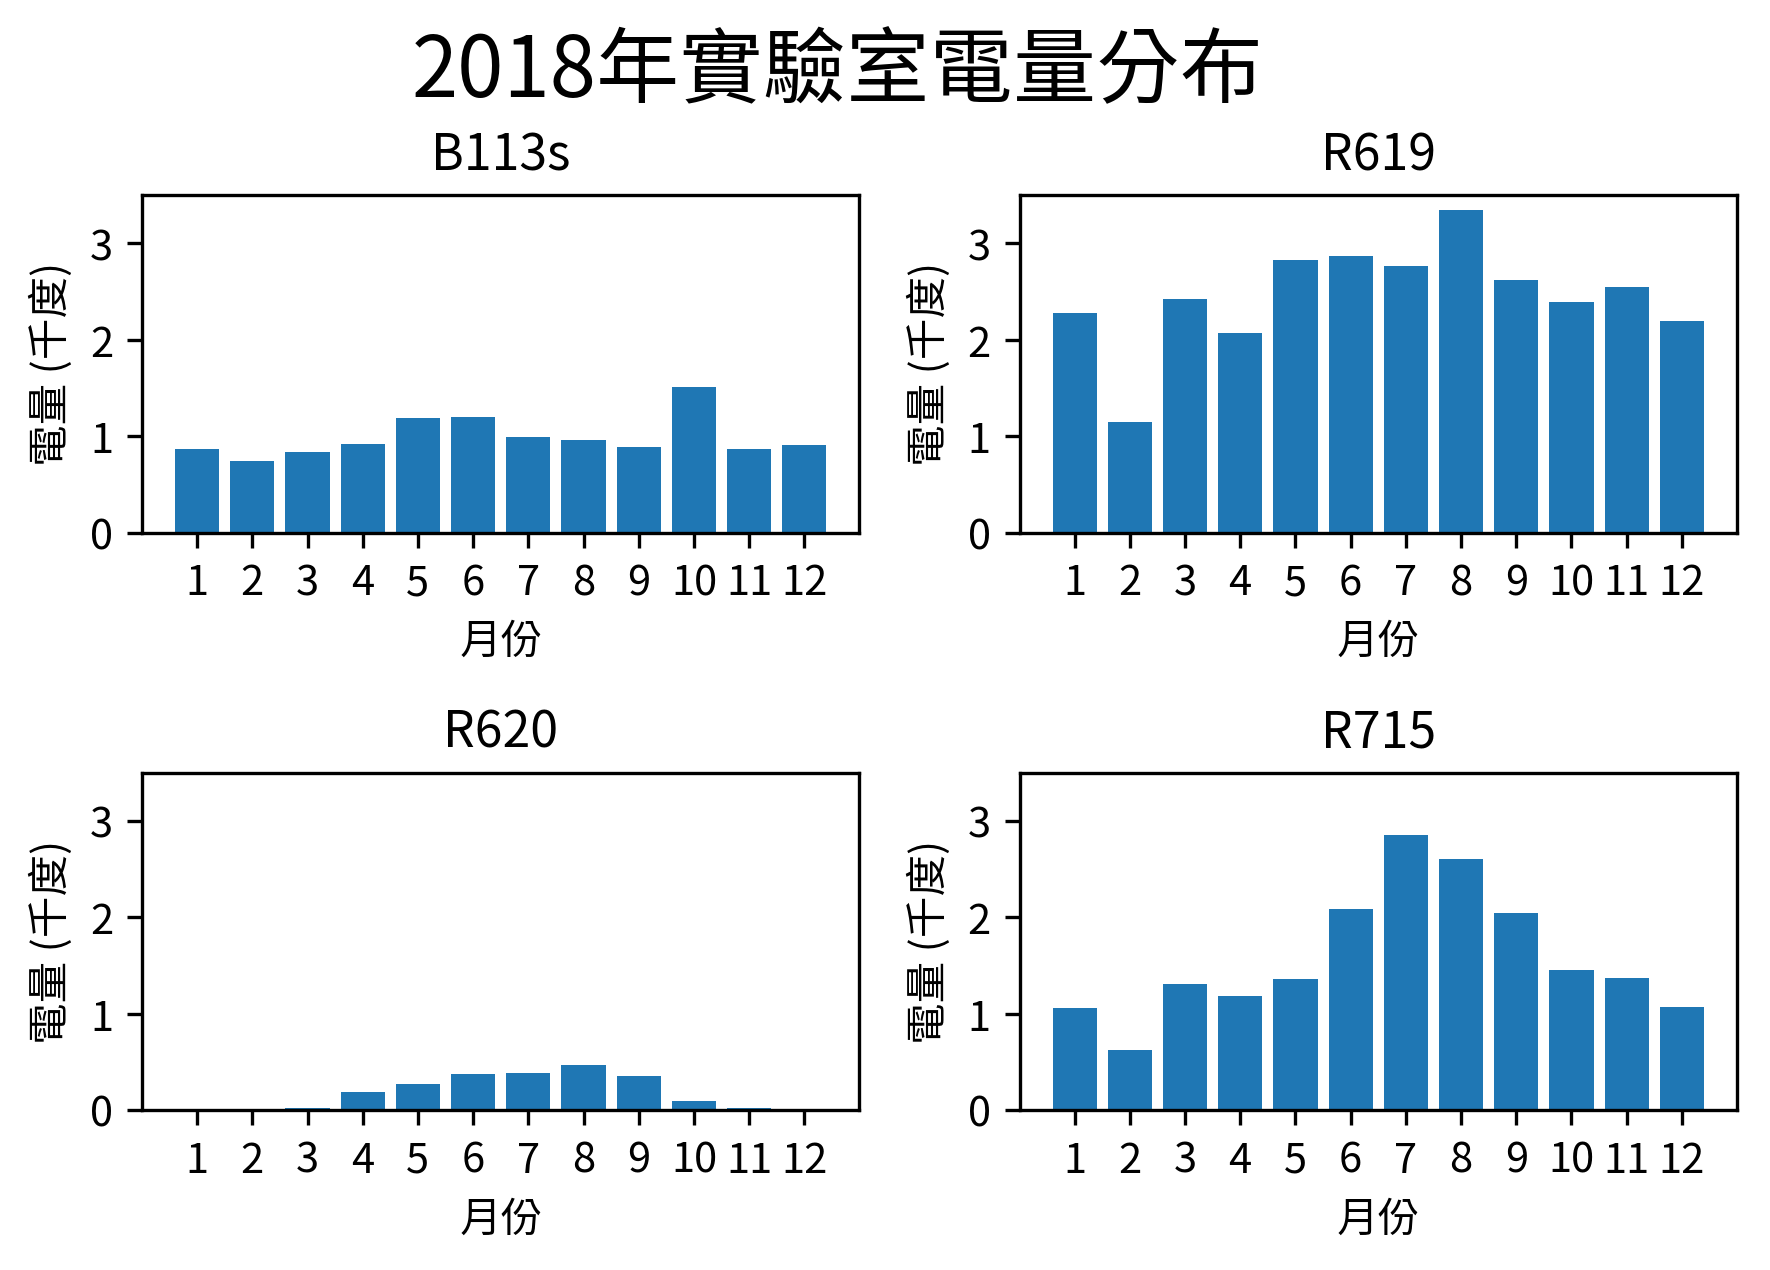

In [2]:
Col_name = df[1][:].loc[2]
Col_name[0] = "月份"
df2 = df[1][4:]
df2.columns = Col_name
B113s = df2["B113s"][:-1].apply(locale.atof)
R619 = df2["R619"][:-1].apply(locale.atof)
R620 = df2["R620"][:-1].apply(locale.atof)
R715 = df2["R715"][:-1].apply(locale.atof)
month = df2["月份"][:-1]
lab = [B113s, R619, R620, R715]
lab_name = ["B113s", "R619", "R620", "R715"]
plt.figure(dpi=300)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(lab_name[i])
    plt.xlabel("月份")
    plt.ylabel("電量 (千度)")
    plt.ylim(0,3.5)
    plt.bar(month,lab[i]/1000)
plt.text(-12,10.5,"2018年實驗室電量分布",fontsize=20)
plt.tight_layout()

## 物理系總用電量

In [3]:
month_sum = np.zeros(12)
lab_sum = np.zeros(12)
for i in range(12):
    for room in room_num:
        month_sum[i] = month_sum[i] + float(df2[room].values[i])
    for room in lab_name:
        lab_sum[i] = lab_sum[i] + float(df2[room].values[i])

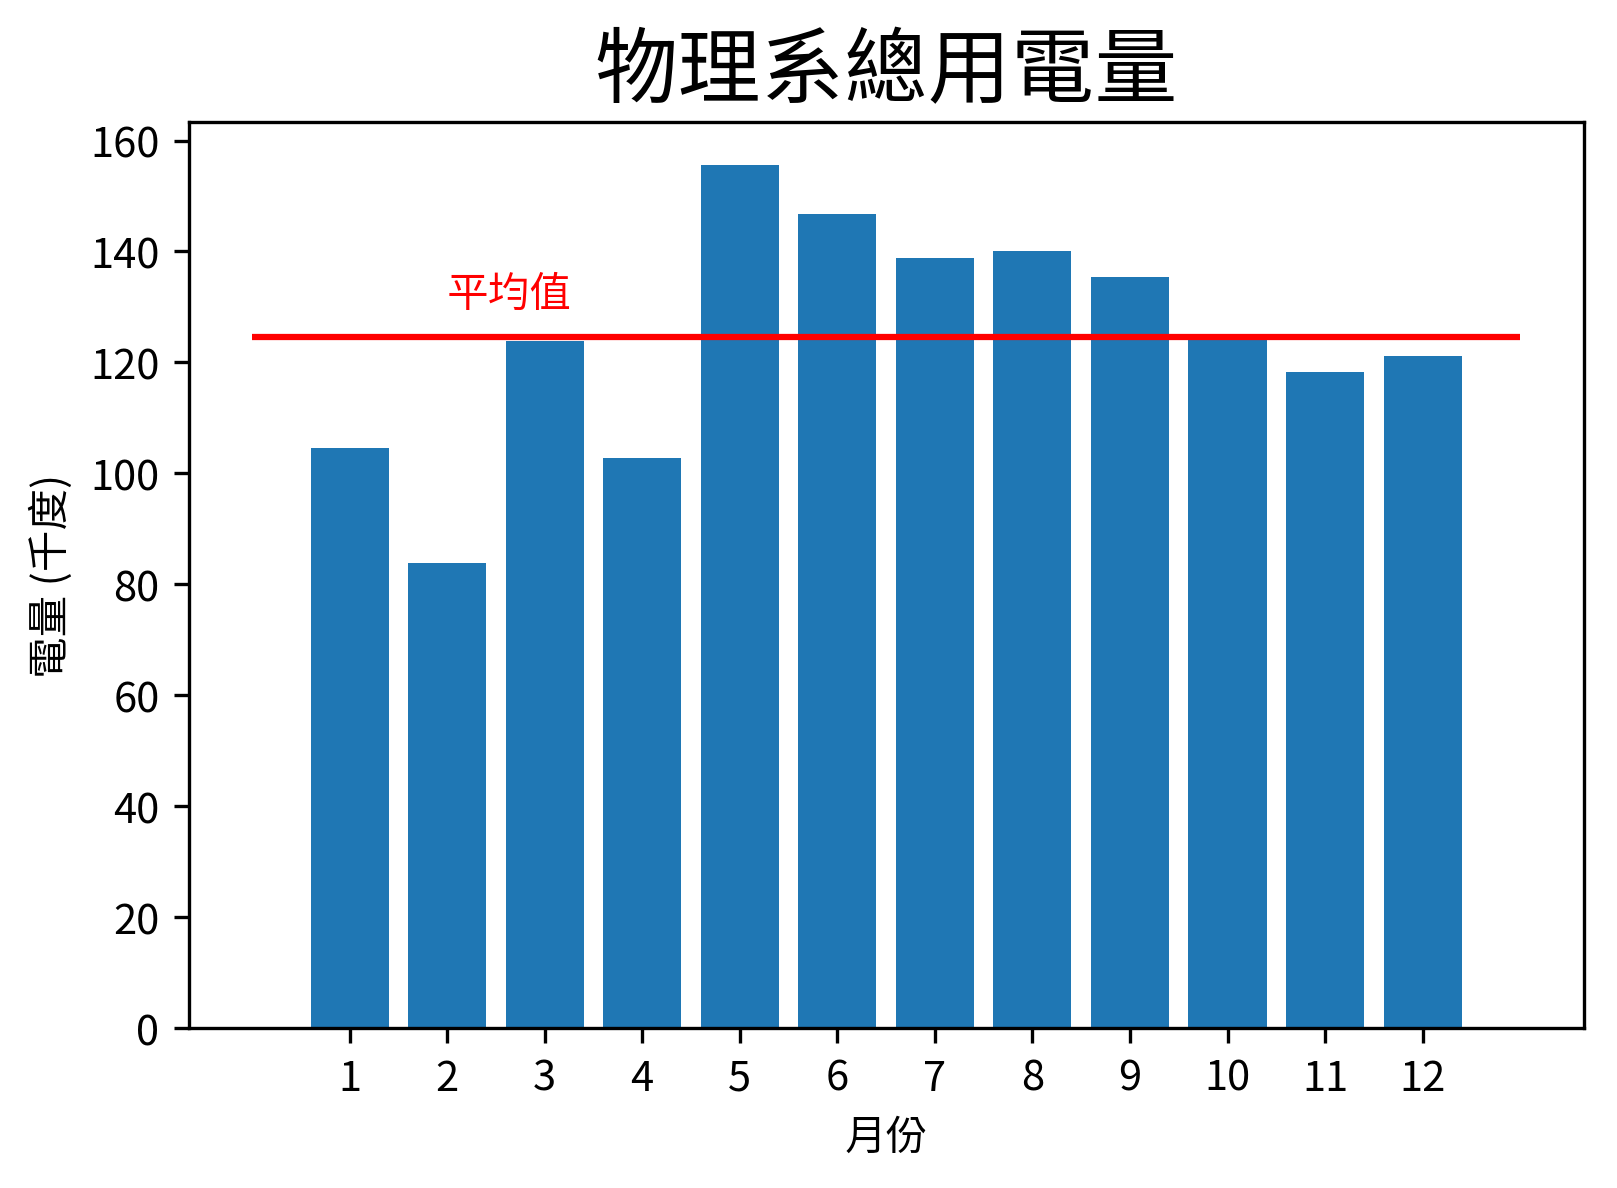

In [4]:
plt.figure(dpi=300)
plt.title("物理系總用電量",fontsize=20)
plt.bar(month,month_sum/1000);
plt.hlines(month_sum.sum()/12/1000,-1,12,color='r')
plt.text(1,130, "平均值", color= 'r');
plt.xlabel("月份");
plt.ylabel("電量 (千度)");

## 實驗室總用電量

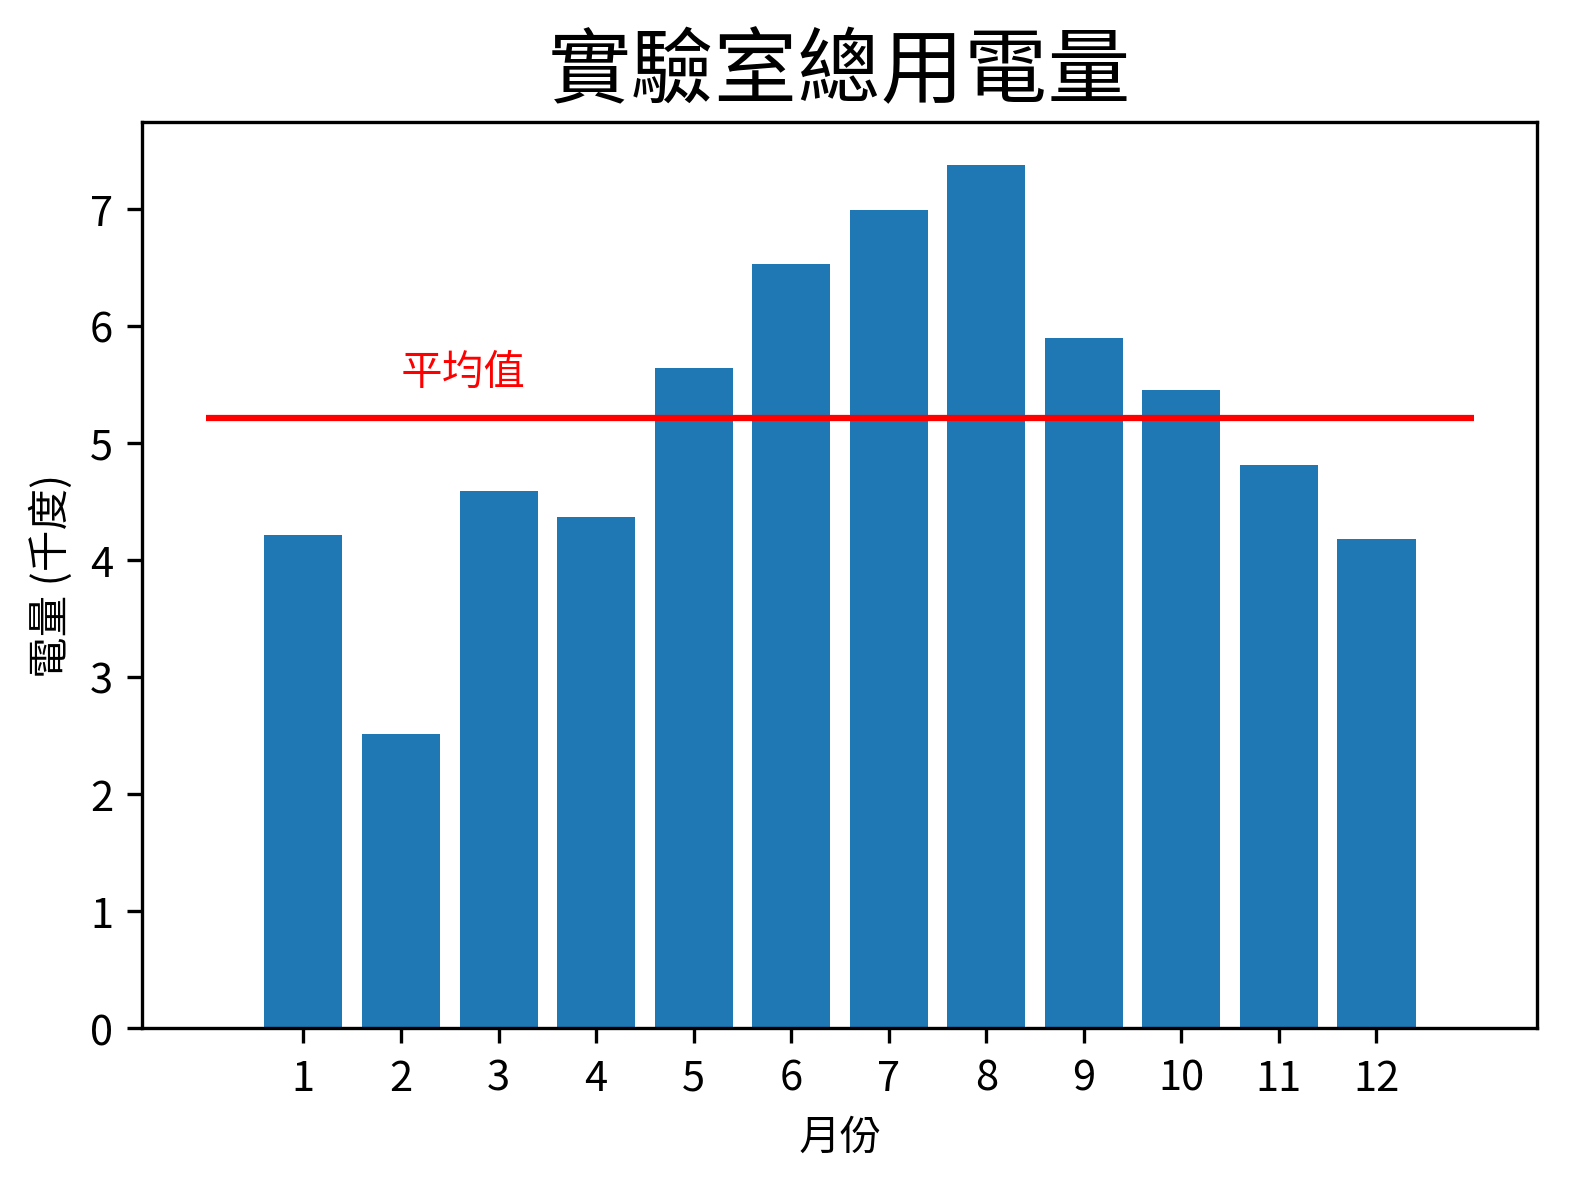

In [5]:
plt.figure(dpi=300)
plt.title("實驗室總用電量",fontsize=20)
plt.bar(month,lab_sum/1000);
plt.hlines(lab_sum.sum()/12/1000,-1,12,color='r')
plt.xlabel("月份")
plt.ylabel("電量 (千度)")
plt.text(1,5.5, "平均值", color= 'r');

## 實驗室用電量比較

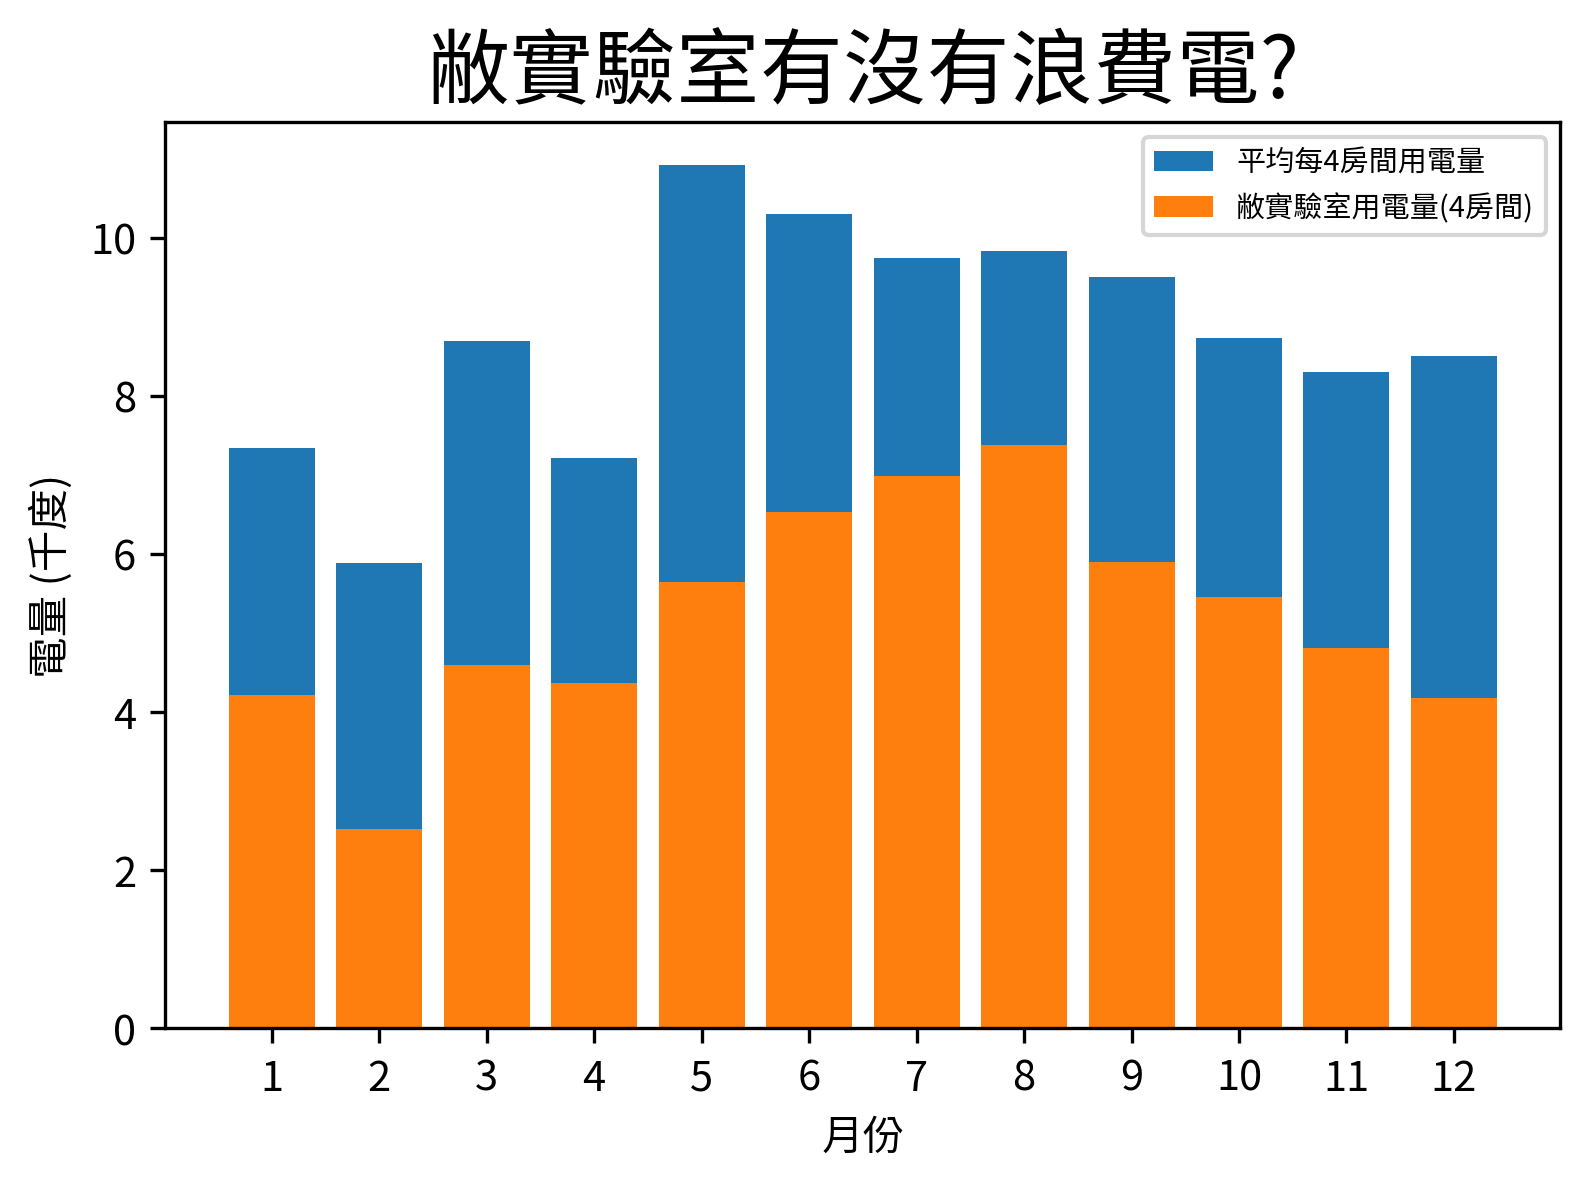

In [6]:
plt.figure(dpi=300)
plt.bar(month, month_sum/57*4/1000, label="平均每4房間用電量")
plt.bar(month,lab_sum/1000, label = "敝實驗室用電量(4房間)")
plt.legend(fontsize=7);
plt.xlabel("月份")
plt.ylabel("電量 (千度)")
plt.title("敝實驗室有沒有浪費電?",fontsize=20);

## 不同樓層用電量

In [7]:
floor_name = df[1].loc[3].values[1:]
floor_name=np.unique(floor_name)
floor_sum = np.zeros(11)
floor_room_num = np.zeros(11)

In [8]:
for i in range(len(floor_name)):
    floor_room_num[i] = len(df2.values[1][df[1].loc[3]  == floor_name[i]])
    for month in range(12):
        for j in df2.values[month][df[1].loc[3]  == floor_name[i]]:
            floor_sum[i] = floor_sum[i] + float(j)

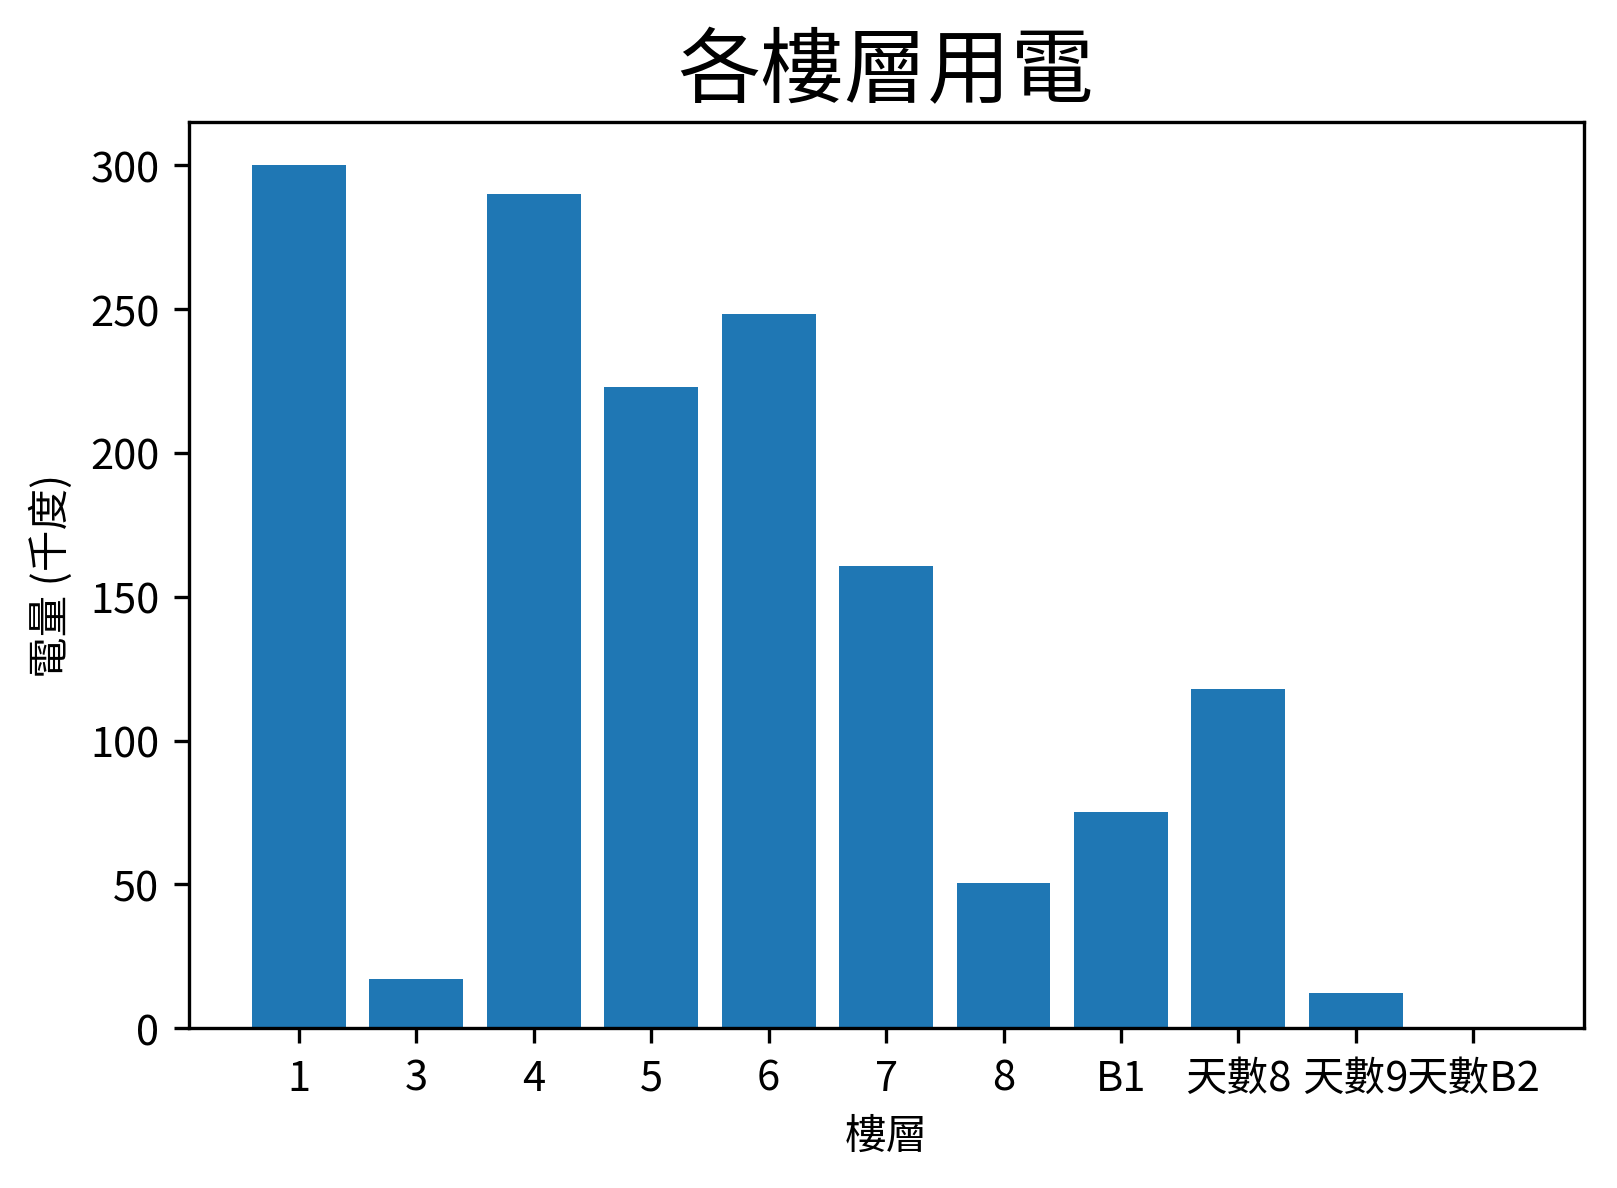

In [9]:
plt.figure(dpi=300)
plt.bar(floor_name, floor_sum/1000)
plt.xlabel("樓層")
plt.ylabel("電量 (千度)")
plt.title("各樓層用電",fontsize=20);

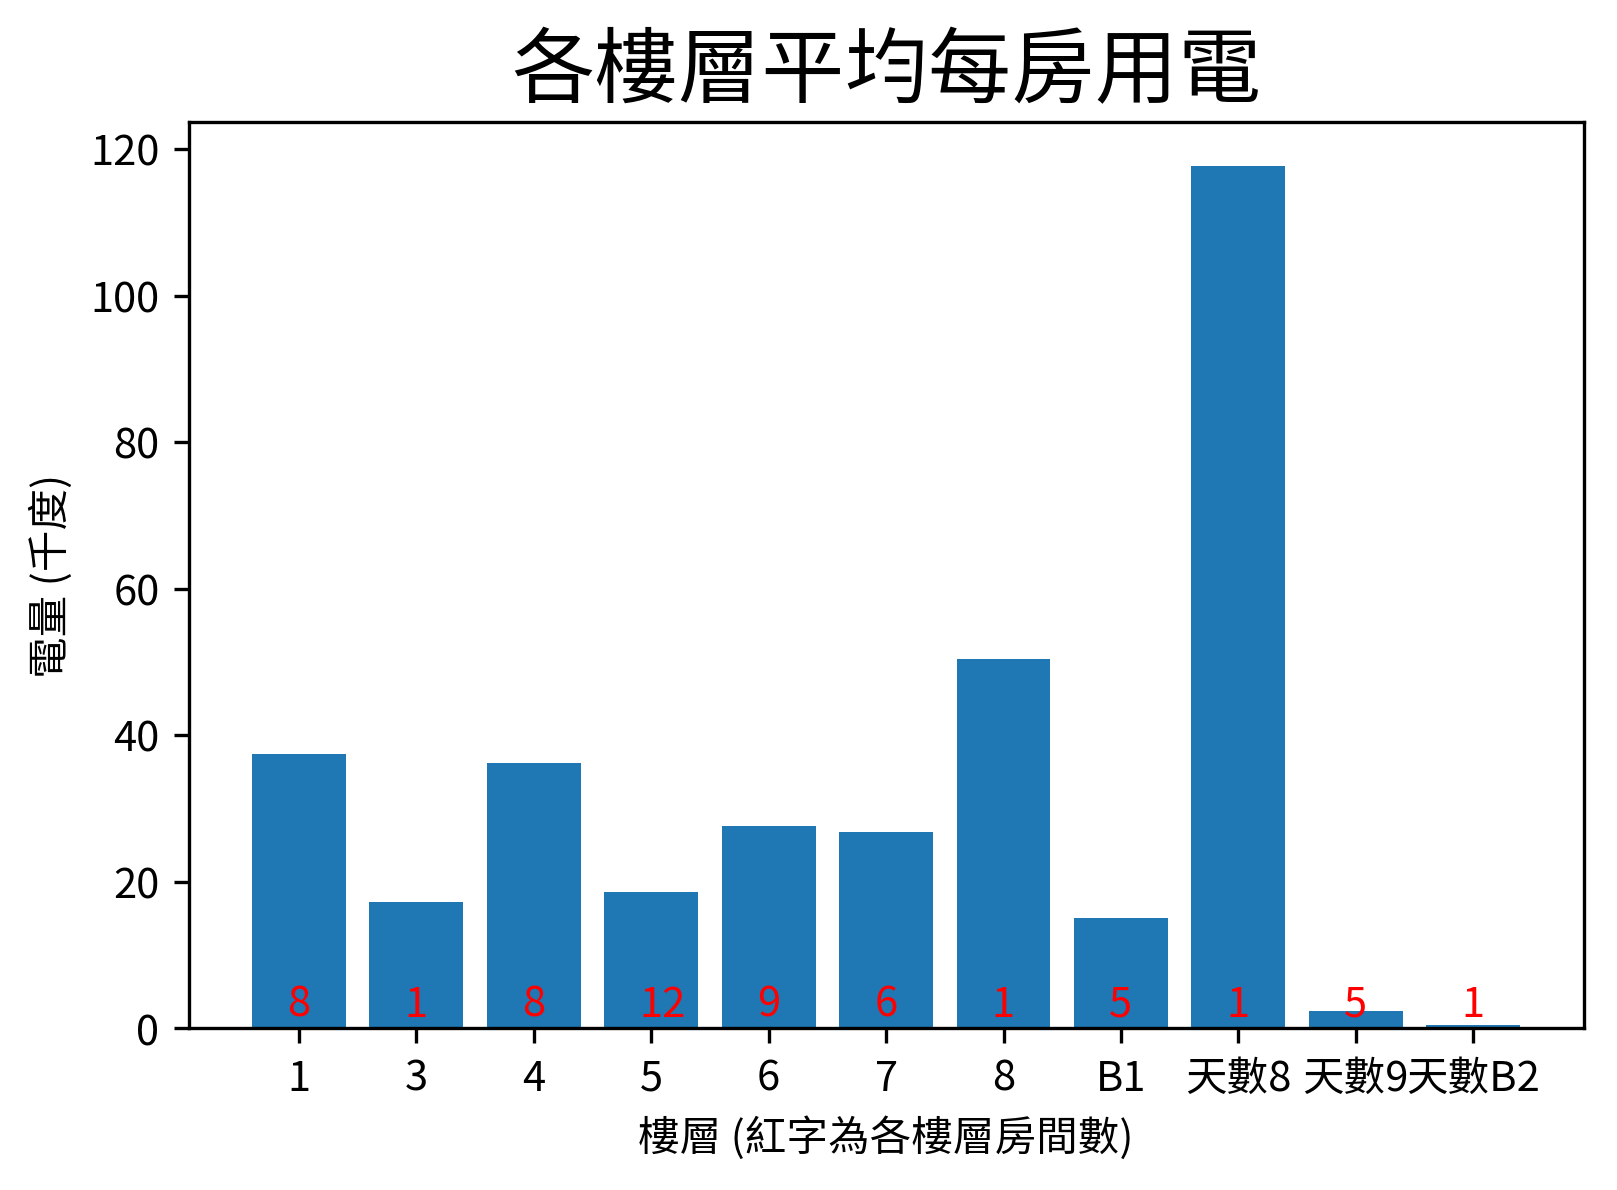

In [10]:
floor_room_num
plt.figure(dpi=300)
plt.bar(floor_name, floor_sum/floor_room_num/1000)
for i in range(len(floor_room_num)):
    plt.text(i-0.1,1.6,str(int(floor_room_num[i])),color = 'r')
plt.xlabel("樓層 (紅字為各樓層房間數)")
plt.ylabel("電量 (千度)")
plt.title("各樓層平均每房用電",fontsize=20);

In [11]:
# 確認用電總數是對的
floor_sum.sum() - month_sum.sum()

0.0

## 不同領域用電量

In [12]:
name_arr = [["",""]]*57
for i in range(1,58):
    name_arr[i-1] = [df[0].loc[2][i], df[0].loc[3][i]]

In [13]:
subject = {"生物生醫":['R831','R714','R613','B119'],
           "自旋磁學":['R715','R620','R619','R614','R612','R611','R511'],
           "半導體物理":['R411','R107','R106','R105A','R105B'],
           "凝態物理":['R622','R621','R410','R407','R110','R109','R108','B120','S915'],
           "電磁應用":['R713','R103'],
           "光電光學":['R514',"R515",'R412','R409','R408','B122','B121'],
           "顯微技術":['B113s'],
           "高能物理":['R712','R518','R519','R520','R521','R510','R306'],
           "天文物理":['S923','S914','S913','S912'],
           "電腦機房":['R704','R603','R513','R504','R503','R417','S859'],
           "其他":['R711','R512','R402','SB25']}
subject_name = []
subject_num = []
for i in subject:
    subject_name.append(i)
    subject_num.append(len(subject[i]))

In [14]:
subject_sum = np.zeros(11)
for num in range(11):
    for i in df2[subject[subject_name[num]]][:-1].values:
        for j in i:
            subject_sum[num] = subject_sum[num] + float(j)

In [15]:
# 確認用電總數是對的
subject_sum.sum()-month_sum.sum()

0.0

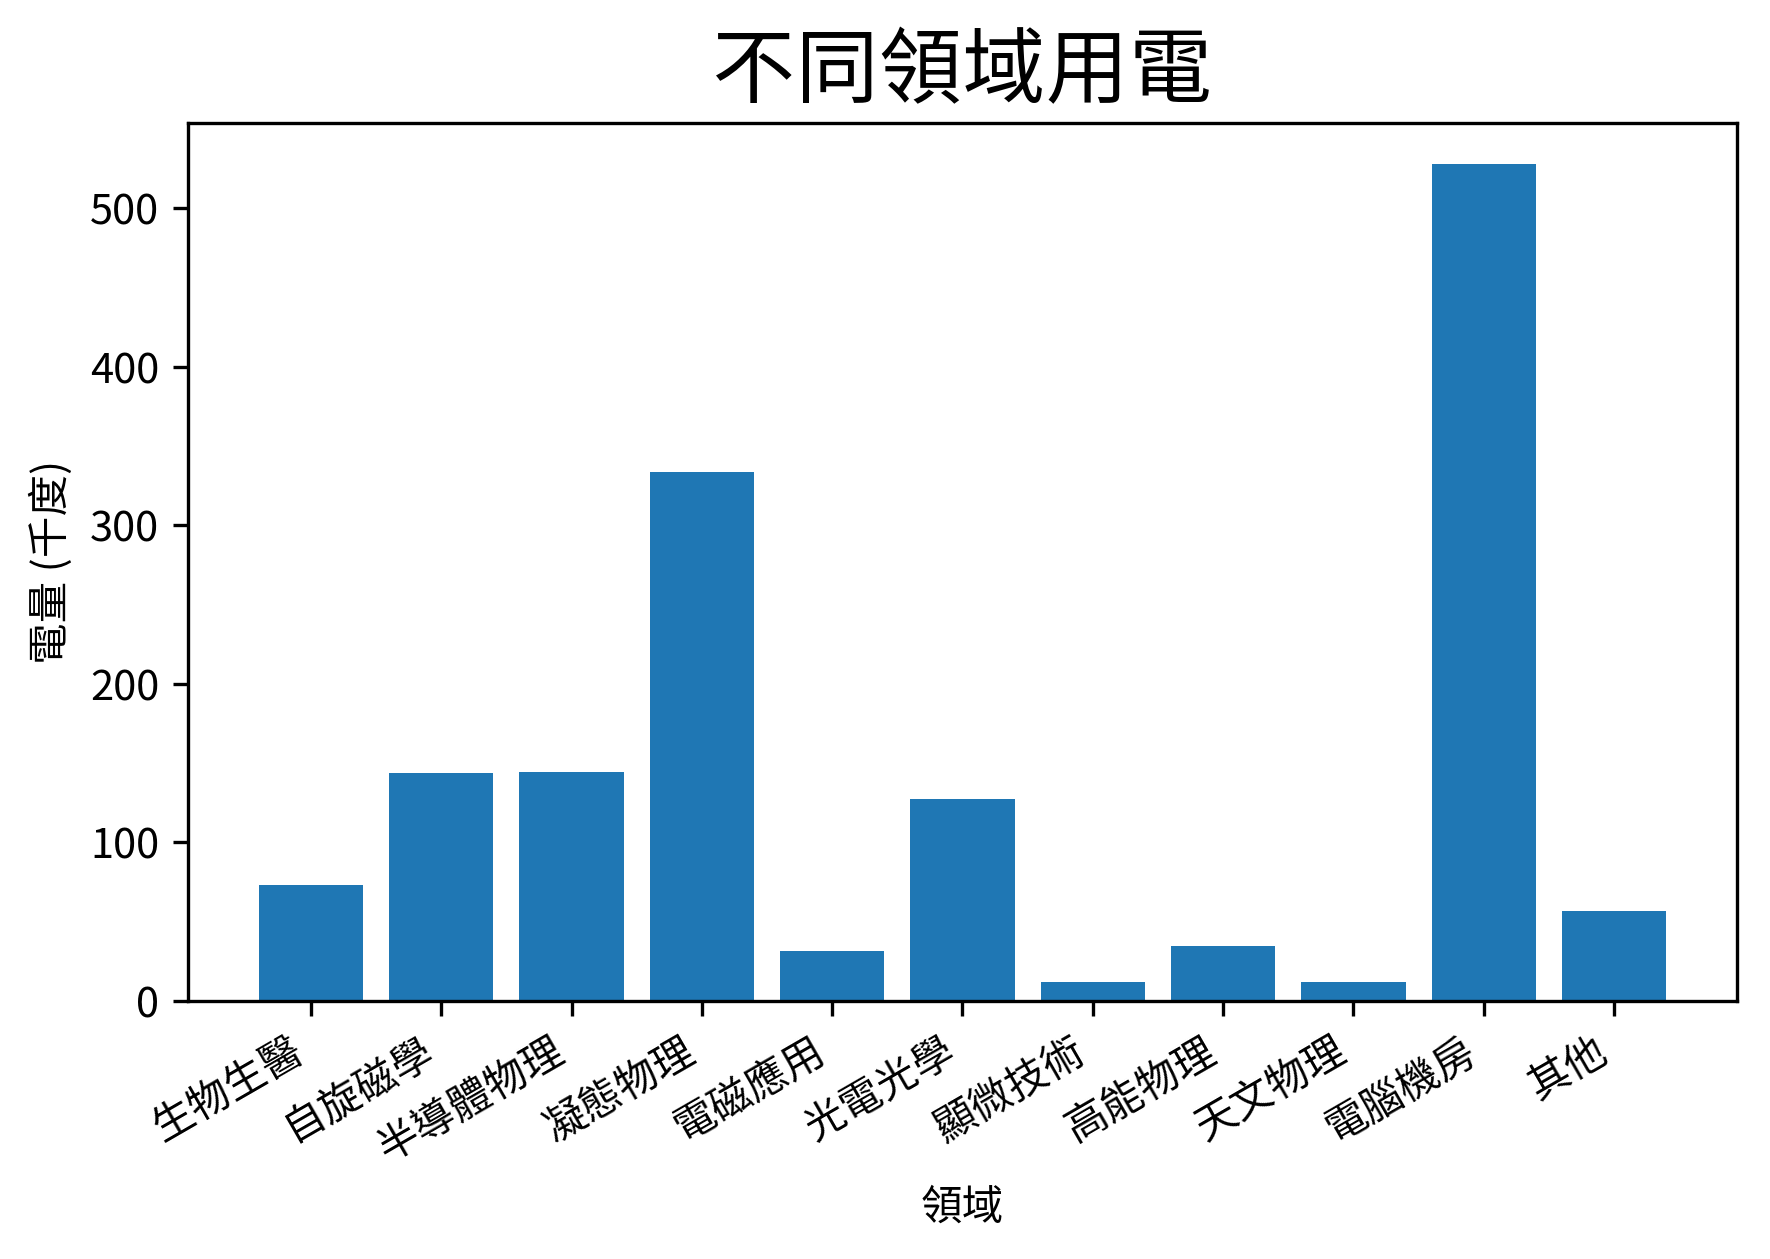

In [16]:
fig = plt.figure(dpi=300)
plt.bar(subject_name, subject_sum/1000)
plt.xlabel("領域")
plt.ylabel("電量 (千度)")
fig.autofmt_xdate()
plt.tight_layout()
plt.title("不同領域用電",fontsize=20);

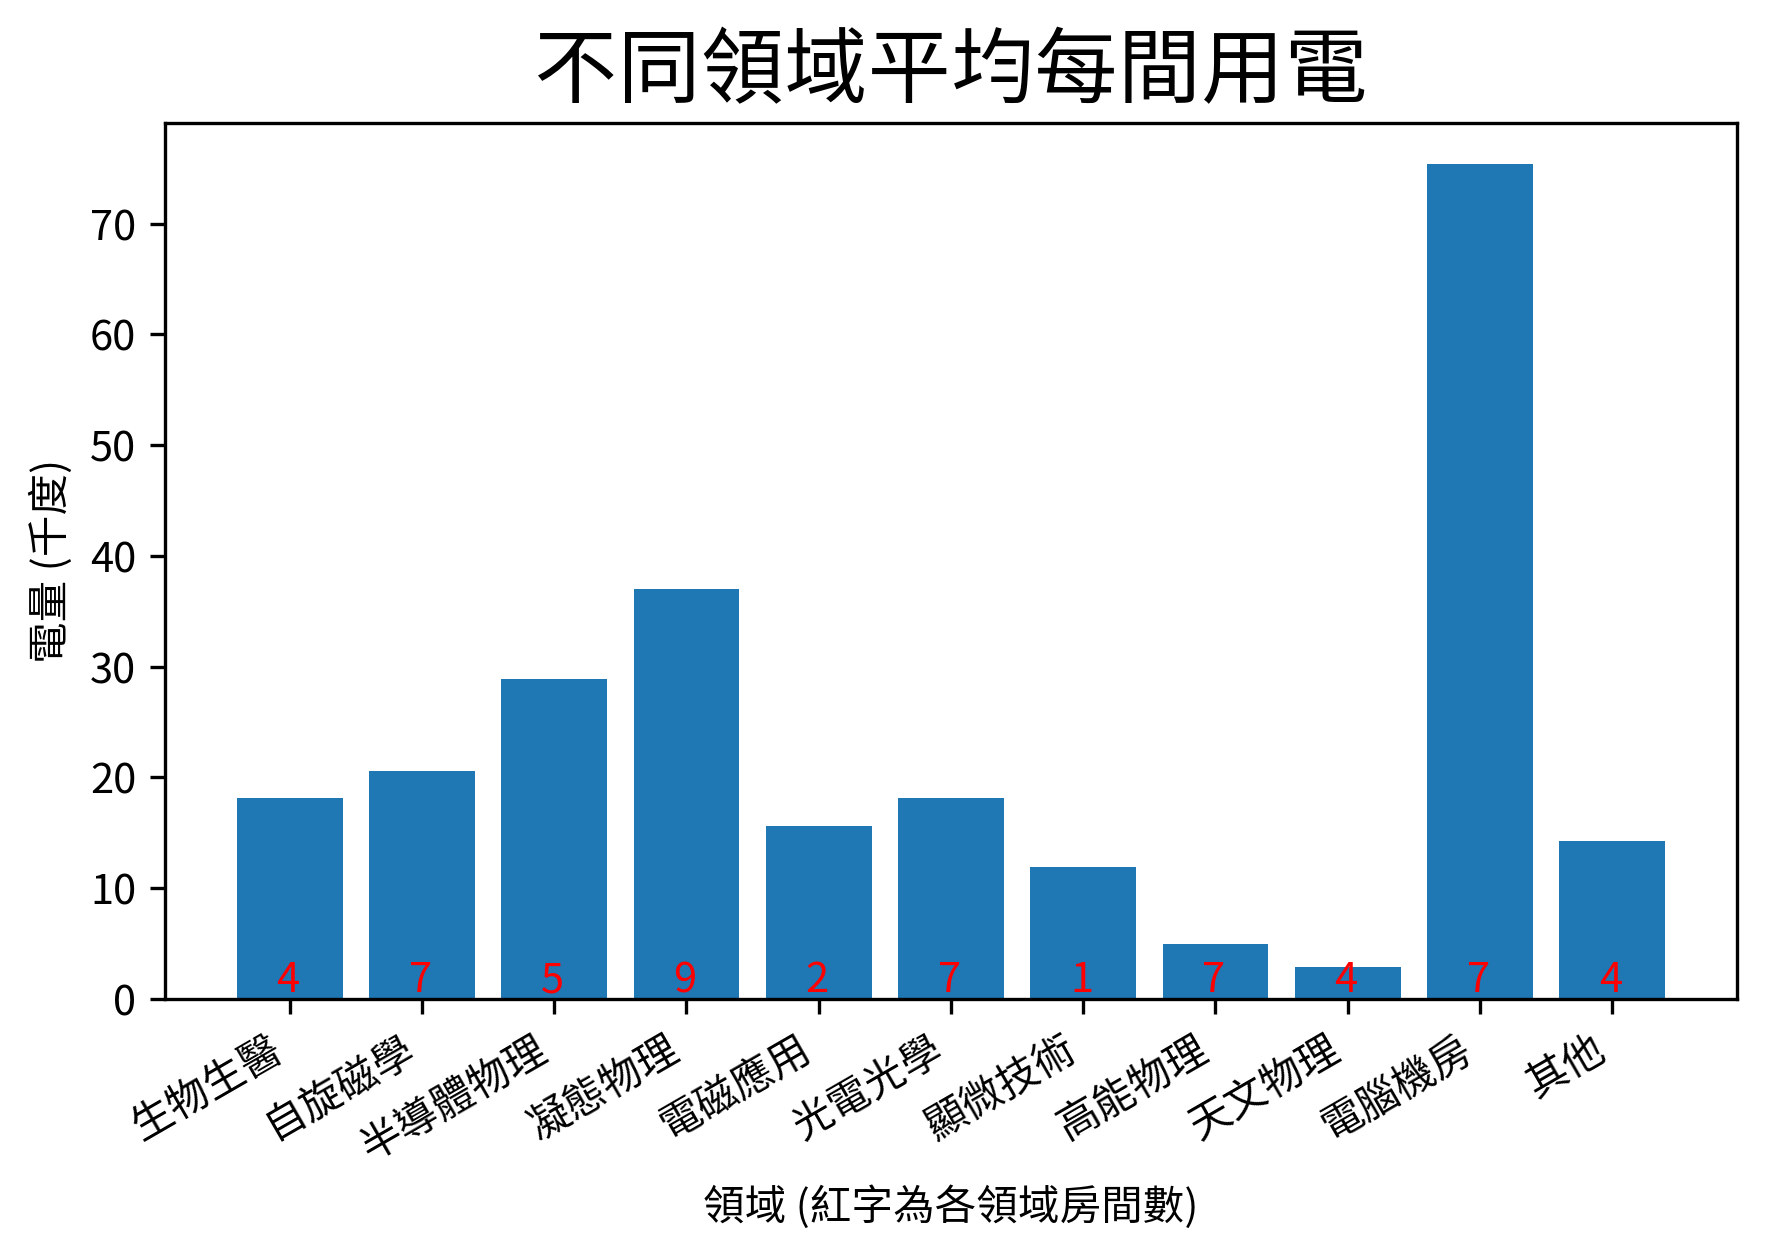

In [17]:
fig = plt.figure(dpi=300)
plt.bar(subject_name, subject_sum/subject_num/1000)
plt.xlabel("領域 (紅字為各領域房間數)")
plt.ylabel("電量 (千度)")
for i in range(len(subject_num)):
    plt.text(i-0.1,0.6,str(int(subject_num[i])),color = 'r')
fig.autofmt_xdate()
plt.tight_layout()
plt.title("不同領域平均每間用電",fontsize=20);

In [18]:
df = pd.read_html("http://140.112.102.175/ROOM/fn4/build.aspx?yr=107&mn=1")
PI_name = {}
name_arr = df[0][0][0][29:359].split(' ')
index = 0
for i in range(0,112,3):
    PI_name[name_arr[i]] = [name_arr[i+1]]

In [19]:
for ctg in PI_name:
    lab_sum = 0
    for mn in range(1,13,1):
        df_test = pd.read_html("http://140.112.102.175/ROOM/fn4/build.aspx?yr=107&mn={}&ctg={}".format(str(mn),ctg))
        data = df_test[1:][0]
        data.columns = data.loc[0]
        for item in data[data["日期\名稱"]=='合計'].values[0]:
            if item != '合計':
                lab_sum = lab_sum + float(item)
    PI_name[ctg].append(lab_sum)

In [20]:
for ctg in PI_name:
    print(PI_name[ctg])

['王立民', 155604.90000000005]
['王名儒', 7017.81]
['石明豐', 1436.3900000000003]
['朱士維', 21163.899999999994]
['朱時宜', 103222.85999999999]
['朱國端', 31234.079999999998]
['吳俊輝', 3179.7699999999995]
['易富國', 3624.26]
['林敏聰', 62560.30999999998]
['邱雅萍', 19141.400000000005]
['孫維新', 3538.2200000000003]
['高英哲', 62741.759999999995]
['高能', 4844.83]
['張慶瑞', 26473.600000000006]
['張顏暉', 10065.360000000004]
['張寶棣', 3386.2400000000002]
['梁啟德', 14643.130000000003]
['許仁華', 53413.67000000001]
['郭光宇', 50034.56]
['陳丕淼', 1014.3300000000003]
['陳永芳', 179204.00999999998]
['陳銘堯', 75183.36999999998]
['博昭銘', 1072.2]
['黃斯洐', 13311.64]
['董成淵', 50446.229999999996]
['熊怡', 8971.879999999997]
['裴思達', 17237.45]
['趙治宇', 29627.269999999997]
['趙挺偉', 403.0000000000001]
['蔡定平', 174502.89000000004]
['闕志鴻', 38.19]
['王立民&邱雅萍', 54546.49]
['孫維新&吳志輝', 0.0]
['張顏暉&梁啟德', 11384.509999999997]
['陳凱風&闕志鴻', 117778.77000000002]
['孫維新&吳俊輝&陳丕淼', 11562.81]
['趙挺偉&張寶棣&陳凱風', 86118.68999999999]
['趙挺偉&陳志泓&蔡政', 107659.48999999999]


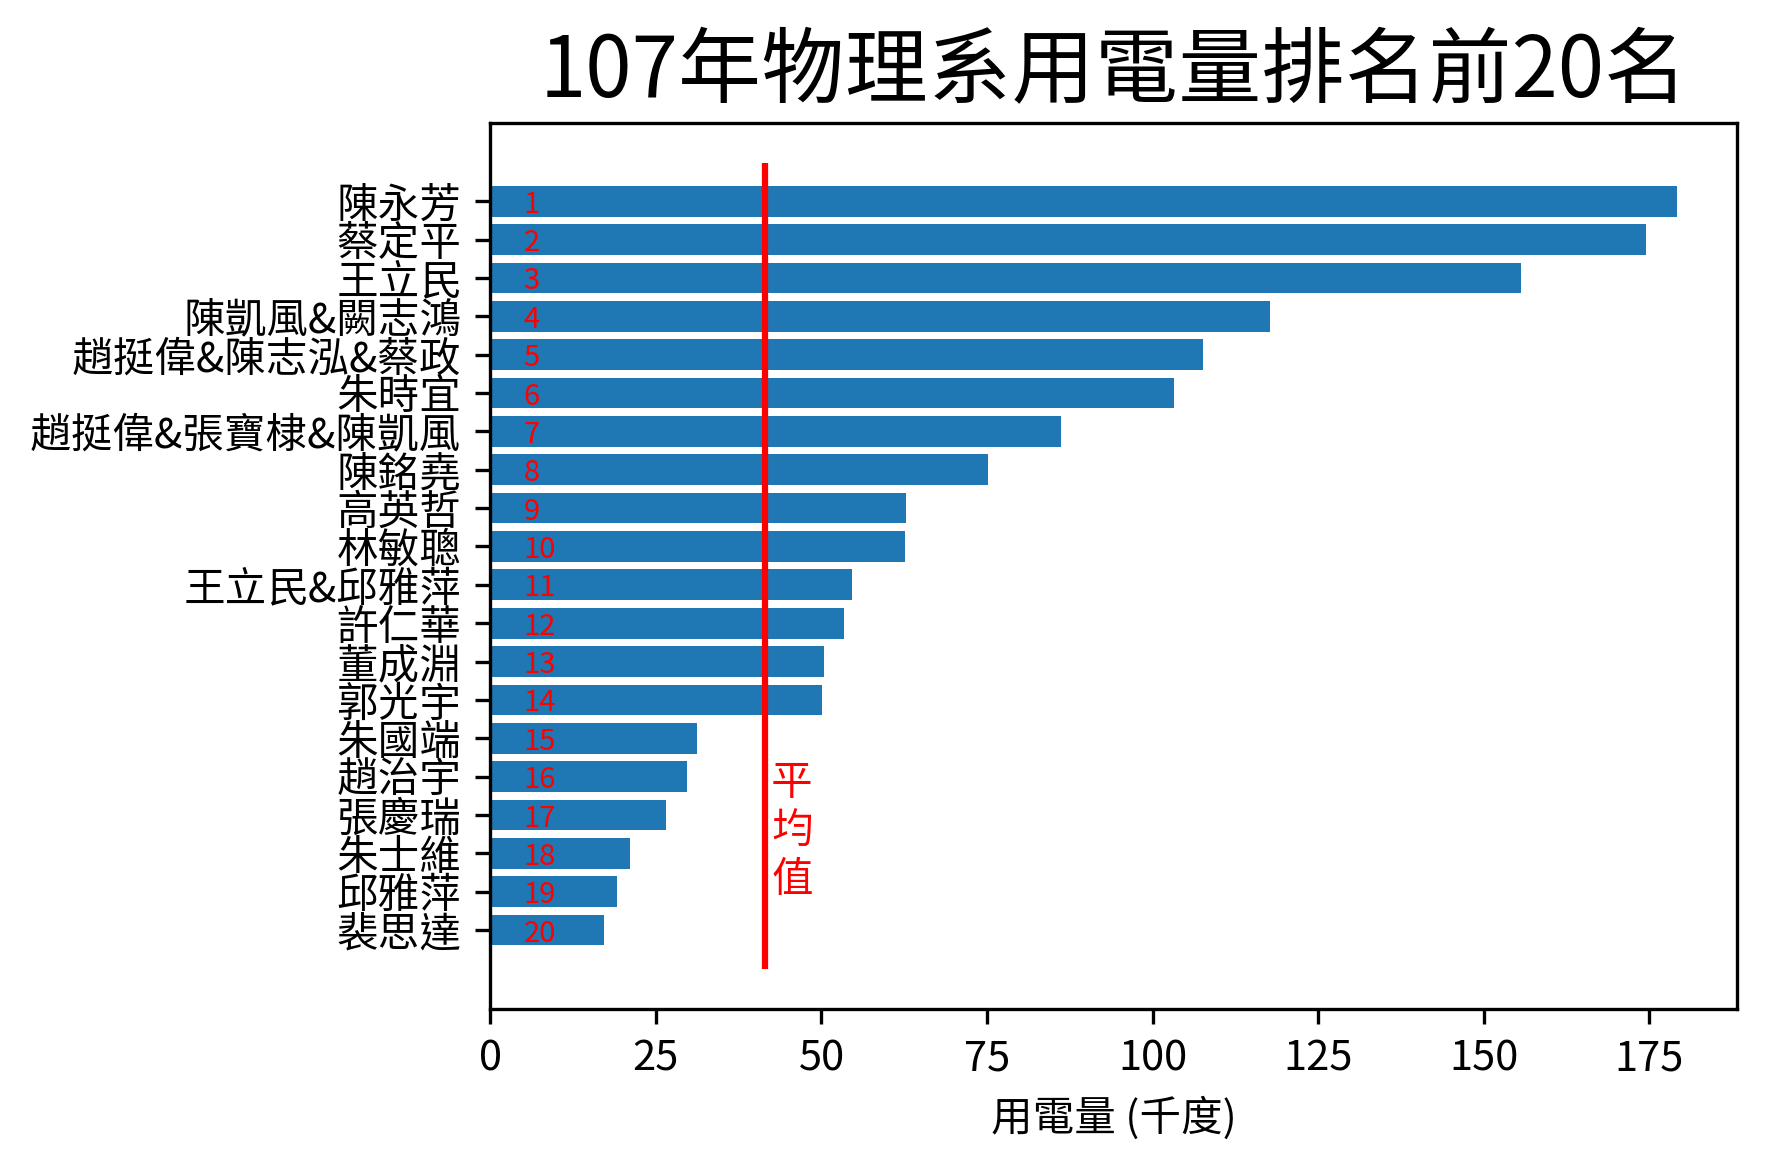

In [21]:
name=[]
value =[]
import pylab as pl
sorted_PI = sorted(PI_name.items(), key=lambda kv: kv[1][1],reverse=True)
for i in range(19,-1,-1):
    name.append(sorted_PI[i][1][0])
    value.append(float(sorted_PI[i][1][1])/1000)
    
# 找平均線 ######
all_sum = 0
for x in PI_name:
    all_sum = all_sum + float(PI_name[x][1])
avg = all_sum/len(PI_name)
##################
    
fig = plt.figure(dpi=300)
plt.barh(name,value)
for i in range(19,-1,-1):
    plt.text(5,18.7-i,str(i+1),color='r',fontsize=7)
plt.xlabel('用電量 (千度)')
plt.vlines(avg/1000,-1,20,'r')
plt.text(avg/1000+1,1,'平\n均\n值',color='r')
plt.title("107年物理系用電量排名前20名", fontsize=20)
fig.tight_layout()

## 小結
前幾名有半導體實驗室也有理論計算的實驗室，相對使用較高電量。  
相當符合前系主任在新聞上的說的電腦機房消耗許多電量。  
不過我們還是無法確定限用電梯對於省電有多少幫助？  
之後我再找找看能不能查到系館一般用電的電錶資訊。  